In [0]:
import pandas as pd
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import numpy as np

In [2]:
# Создание списка тикеров
tickers_list = ['GOOGL', 'XOM', 'KO', 'JNJ', 'AMZN']

# Получение данных для тикеров
tickers_data = yf.download(tickers_list, start='2008-04-01', end='2022-04-01', interval='1wk')

[*********************100%***********************]  5 of 5 completed


Text(0, 0.5, 'Цены закрытия')

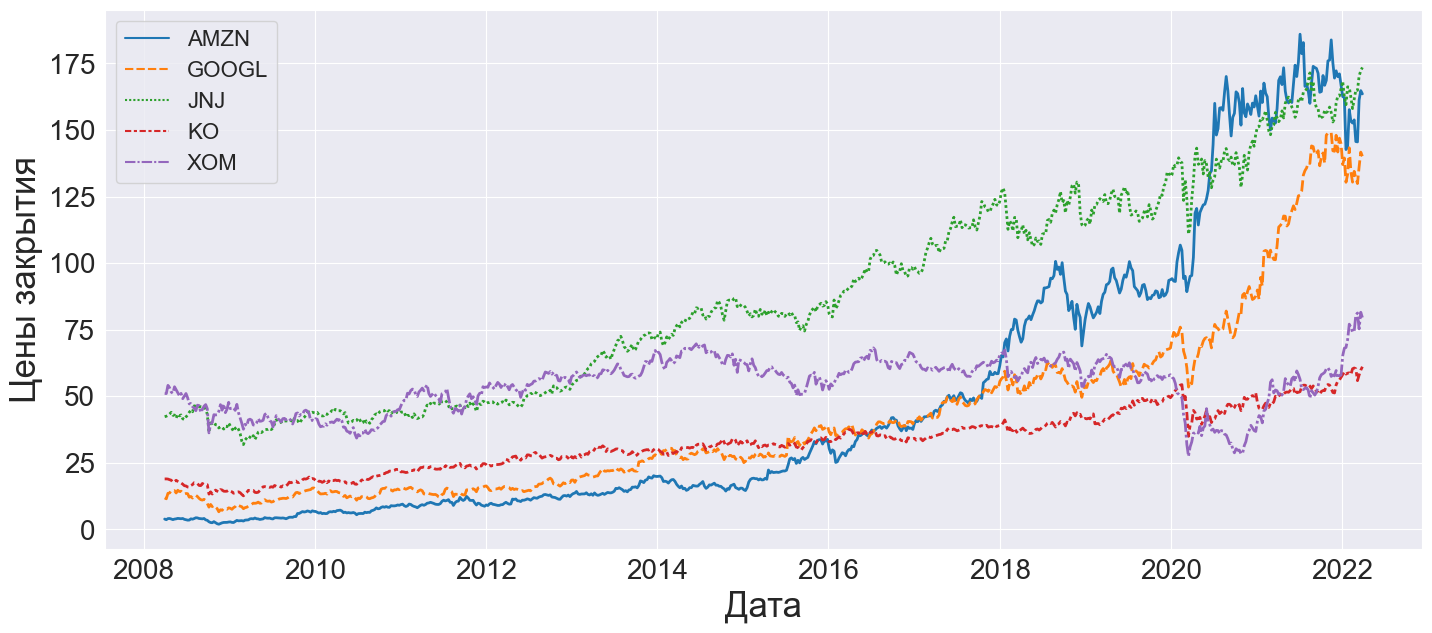

In [3]:
# Извлечение цены закрытия
close_prices = tickers_data['Adj Close']

plt.figure(figsize=(17, 7))
sns.lineplot(data=close_prices, linewidth=2)
plt.legend(fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Дата', fontsize=25)
plt.ylabel('Цены закрытия', fontsize=25)

In [4]:
# Создание нового временного ряда с 150 элементами
new_df = close_prices.resample('2M').mean()  # Измените 'D' на нужную вам частоту

# Интерполяция для заполнения пропущенных значений
new_df = new_df.interpolate(method='linear')

# Уменьшение количества элементов до 150
new_df = new_df
# new_df.to_excel('close_prices.xlsx')

In [5]:
close_prices

,AMZN,GOOGL,JNJ,KO,XOM
Date,,,,,
2008-03-31,3.843500,11.789039,42.293938,18.905588,51.039570
2008-04-07,3.599500,11.447698,42.467663,18.918140,50.970539
2008-04-14,4.005000,13.498749,42.795834,18.861662,54.064907
2008-04-21,4.043000,13.615115,43.310570,18.616907,53.179180
2008-04-28,3.865500,14.546797,43.921864,18.441185,51.539970
...,...,...,...,...,...
2022-02-28,145.641006,131.906494,165.014359,60.309437,80.455460
2022-03-07,145.524506,129.870499,164.887787,55.827431,81.249588
2022-03-14,161.250504,136.125504,170.233124,57.928673,75.269722


In [6]:
# Рассчет доходности портфеля

df = pd.DataFrame(close_prices.pct_change().dropna())

Text(0, 0.5, 'Доходности активов')

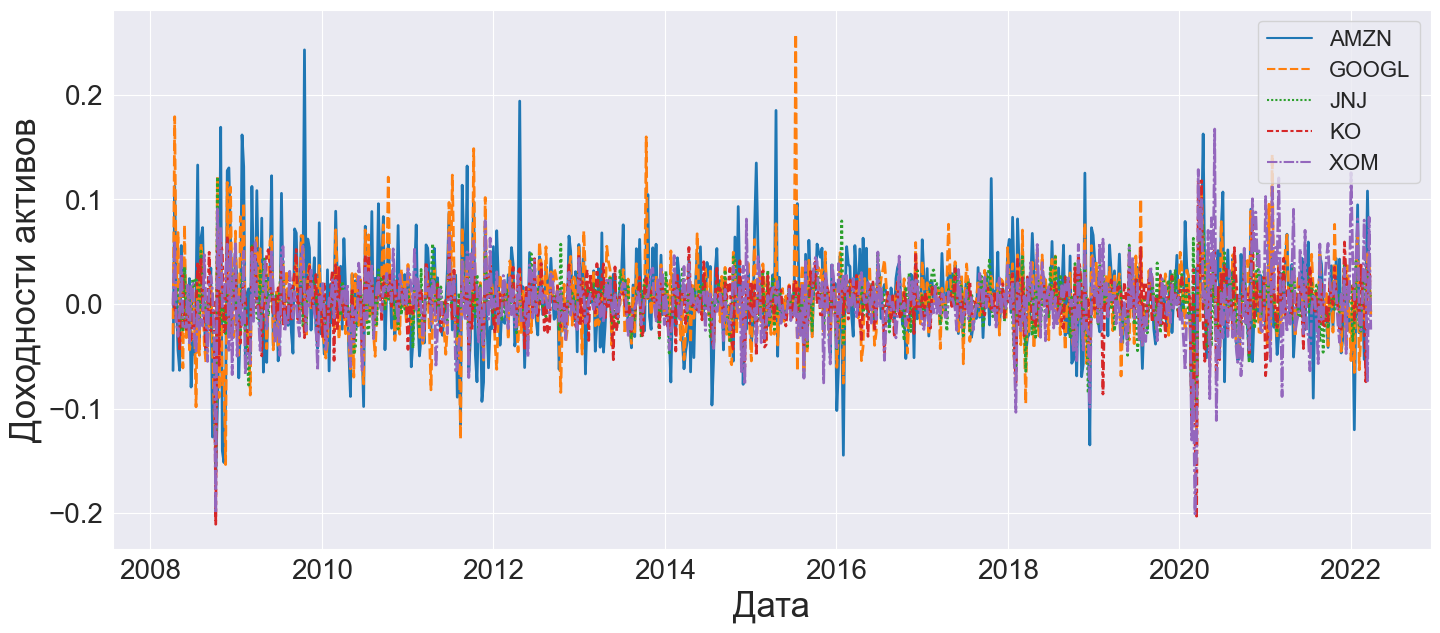

In [7]:
plt.figure(figsize=(17, 7))
sns.lineplot(data=df, linewidth=2)
plt.legend(fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Дата', fontsize=25)
plt.ylabel('Доходности активов', fontsize=25)

In [8]:
# Создание нового временного ряда с 150 элементами
new_df = df.resample('2M').mean()  # Измените 'D' на нужную вам частоту

# Интерполяция для заполнения пропущенных значений
new_df = new_df.interpolate(method='linear')

# Уменьшение количества элементов до 150
new_df = new_df
new_df.to_excel('returns.xlsx')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'Распределение доходности портфеля')

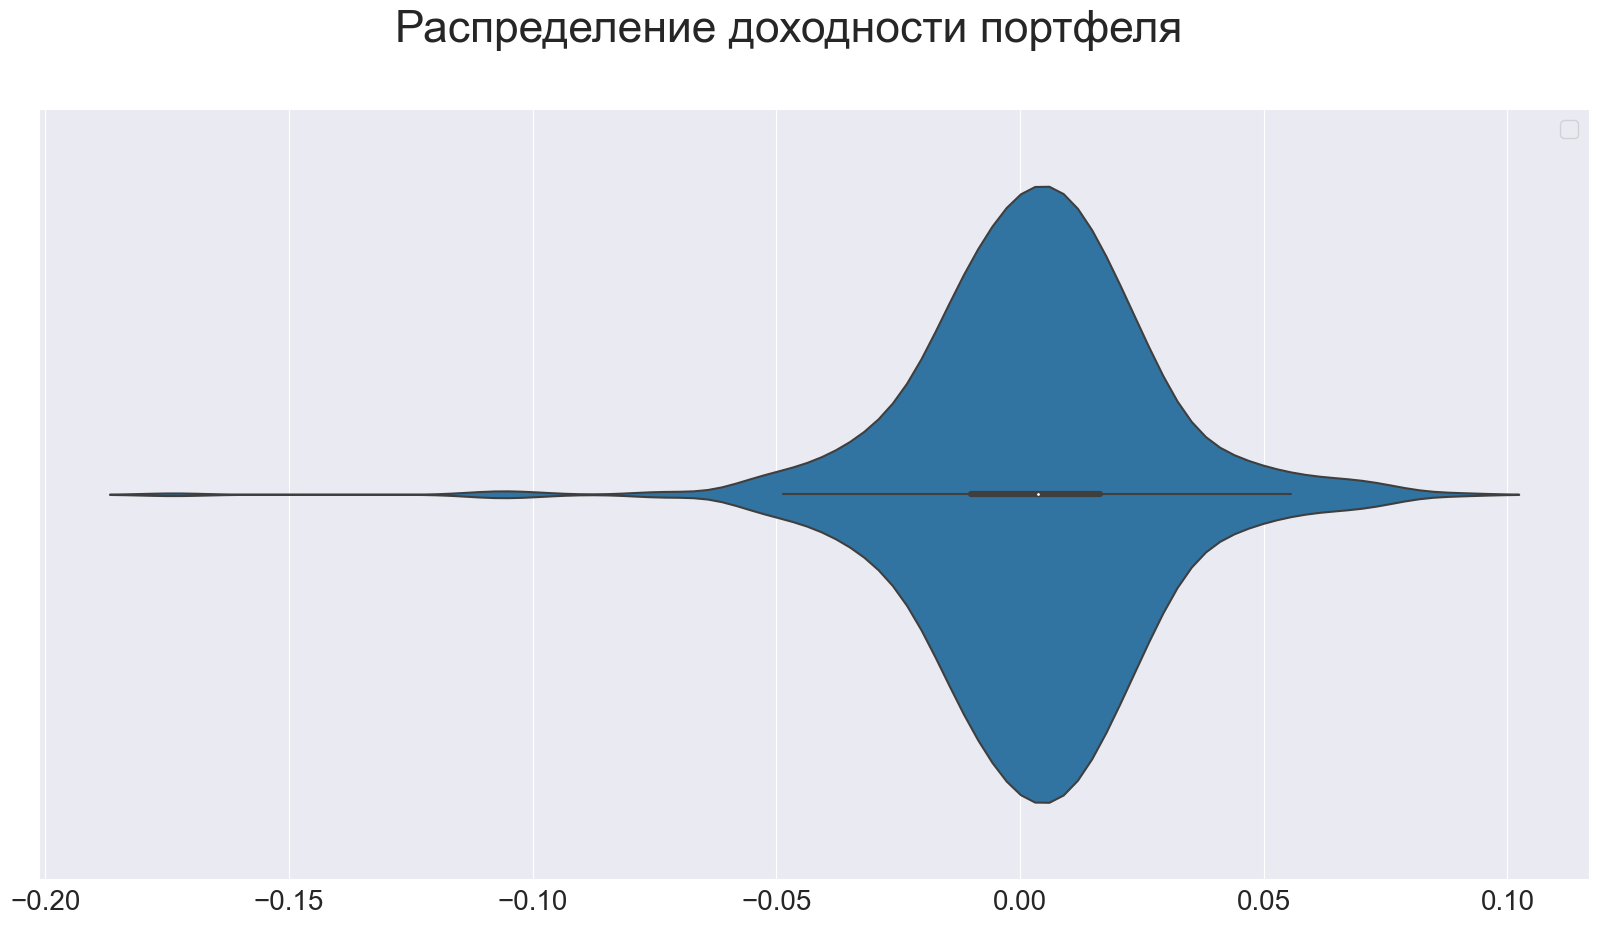

In [9]:
plt.figure(figsize=(20, 10))
sns.violinplot(x=df.mean(axis=1))

plt.legend(fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=0)
plt.suptitle('Распределение доходности портфеля', fontsize=32)

In [10]:
df.mean(axis=1)

Date
2008-04-07   -0.017804
2008-04-14    0.071455
2008-04-21    0.000155
2008-04-28   -0.000324
2008-05-05   -0.031149
                ...   
2022-02-28    0.004967
2022-03-07   -0.016290
2022-03-14    0.030537
2022-03-21    0.037827
2022-03-28   -0.002714
Length: 730, dtype: float64

# Удаление выбросов методом трёх среднеквадратических отклонений

In [11]:
df = df[(df.mean(axis=1) > df.mean(axis=1).mean() - df.mean(axis=1).std() * 3) & (df.mean(axis=1) < df.mean(axis=1).mean() + df.mean(axis=1).std() * 3)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'Распределение доходности портфеля после удаления выбросов')

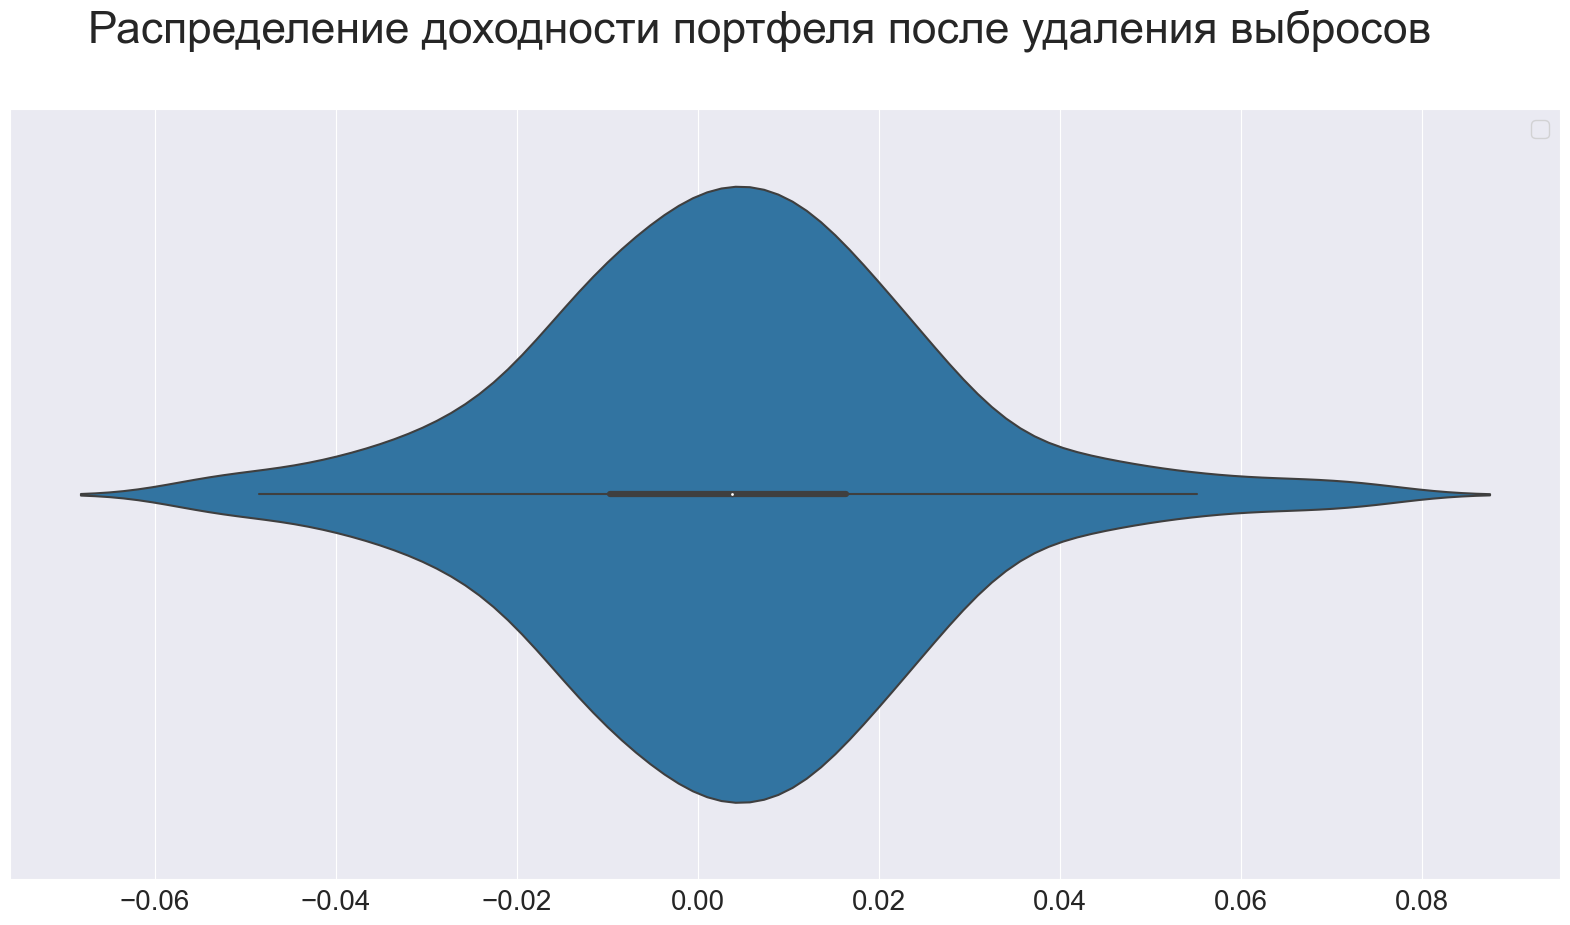

In [12]:
plt.figure(figsize=(20, 10))
sns.violinplot(x=df.mean(axis=1))

plt.legend(fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=0)
plt.suptitle('Распределение доходности портфеля после удаления выбросов', fontsize=32)

# Проверка распределения средних доходностей на нормальность с помощью теста Шапиро-Уилка

## $\alpha = 0.05$

In [13]:
stats.shapiro(df.mean(axis=1))[1]

3.0150183647492668e-06

### $p-value < \alpha$, следовательно распределение не является нормальным

### Далее будут использоваться непараметрические тесты

In [14]:
# df.to_pickle('tickers.pkl')

Text(0.5, 0.98, 'Тепловая карта корреляций')

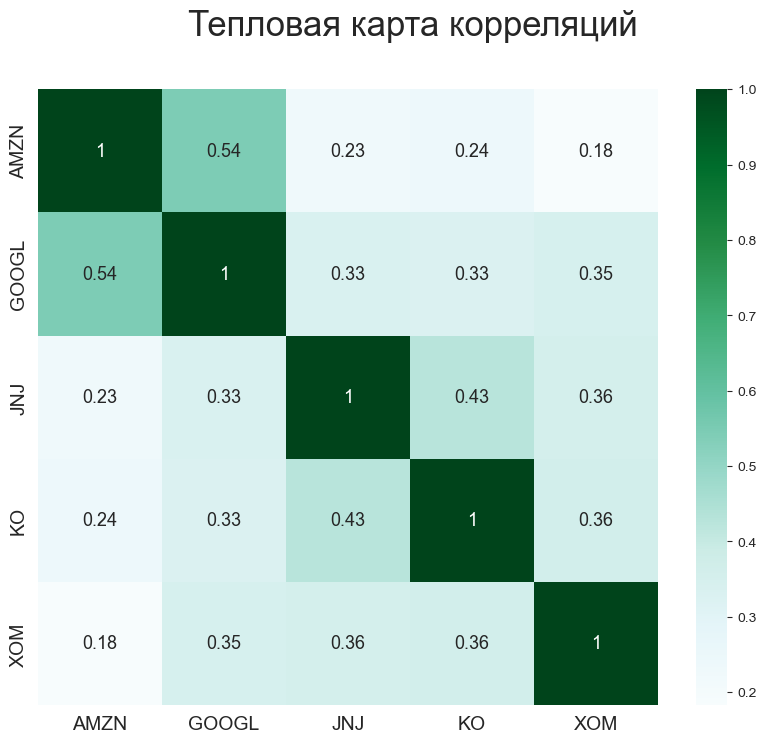

In [15]:
# Проверка мультиколлинеарности

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='BuGn', annot_kws={"fontsize":13})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.suptitle('Тепловая карта корреляций', fontsize=25)


Мы видим, что значимой корреляции между активами нет.

In [16]:
# Определяю веса
tickers = ['AMZN', 'GOOGL', 'JNJ', 'KO', 'XOM']
equal_weights = [1/5, 1/5, 1/5, 1/5, 1/5]
conservative_weights = [0.05, 0.1, 0.4, 0.4, 0.05]
aggressive_weights = [0.4, 0.1, 0.05, 0.05, 0.4]

df.std(ddof=1)

AMZN     0.045147
GOOGL    0.037505
JNJ      0.021483
KO       0.022976
XOM      0.031246
dtype: float64

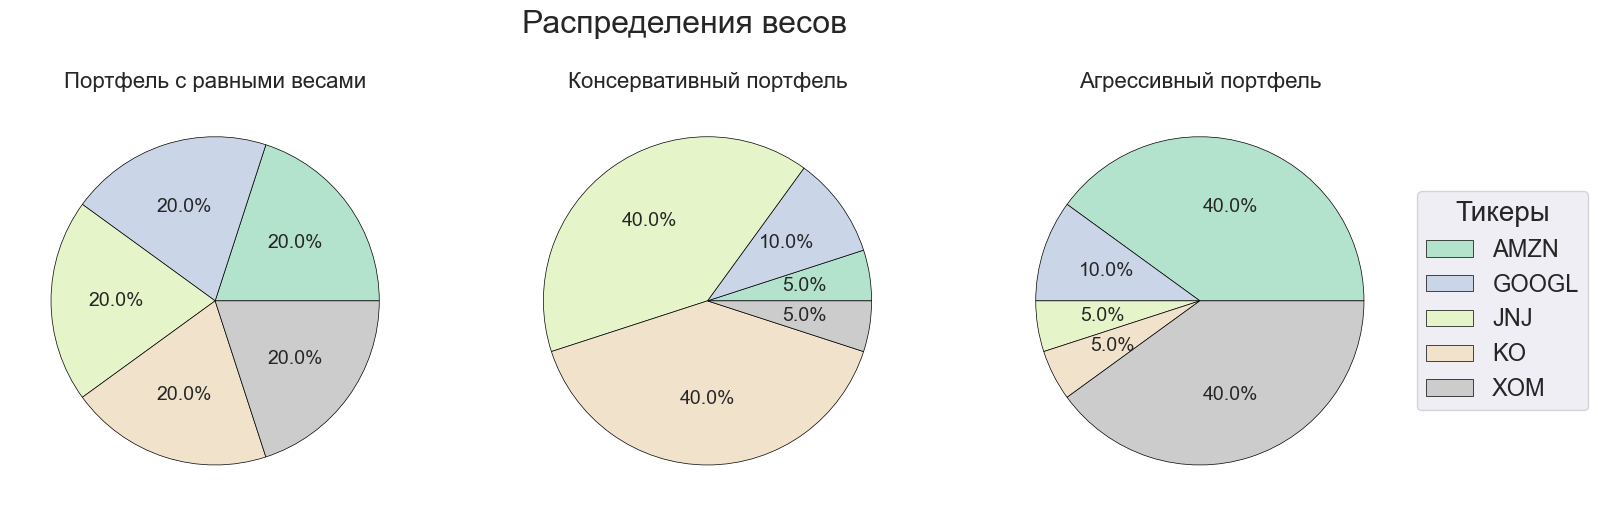

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Распределения весов', fontsize=23)
palette = plt.get_cmap('Pastel2')

# Портфель с равными весами
equal = axs[0].pie(equal_weights, wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
                   autopct='%1.1f%%', colors=palette(np.linspace(0, 1, len(tickers))), textprops={'fontsize': 14})
axs[0].set_title('Портфель с равными весами', fontsize=16)

# Консервативный портфель
conservative = axs[1].pie(conservative_weights, wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
                          autopct='%1.1f%%', colors=palette(np.linspace(0, 1, len(tickers))), textprops={'fontsize': 14})
axs[1].set_title('Консервативный портфель', fontsize=16)

# Агрессивный портфель
aggressive = axs[2].pie(aggressive_weights, wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
                        autopct='%1.1f%%', colors=palette(np.linspace(0, 1, len(tickers))), textprops={'fontsize': 14})
axs[2].set_title('Агрессивный портфель', fontsize=16)
axs[2].legend(aggressive[0], tickers, title="Тикеры", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=17, title_fontsize=20)




In [19]:
# Рассчитываем общую доходность портфеля

portfolio_returns_equal = (df * equal_weights).sum(axis=1)
portfolio_returns_conservative = (df * conservative_weights).sum(axis=1)
portfolio_returns_aggressive = (df * aggressive_weights).sum(axis=1)

# Создание вспомогательных переменных

portfolio_returns_names = ['portfolio_returns_equal', 'portfolio_returns_conservative', 'portfolio_returns_aggressive']
portfolio_returns = pd.concat(
    [portfolio_returns_equal,
     portfolio_returns_conservative,
     portfolio_returns_aggressive],
    keys=portfolio_returns_names,
    axis=1)


In [20]:
# Рассчитываем волатильность каждого портфеля

print(
    ' Портфель с равными весами:', portfolio_returns_equal.std(ddof=1), '\n',
    'Консервативный портфель:', portfolio_returns_conservative.std(ddof=1), '\n',
    'Агрессивный портфель:', portfolio_returns_aggressive.std(ddof=1)
)

 Портфель с равными весами: 0.02196020213793403 
 Консервативный портфель: 0.01857100938756834 
 Агрессивный портфель: 0.027076141843426587


## Для определения статистической значимости при сравнении волатильности портфелей использую тест Левена и сравниваю дисперсии выборок
#### H0 (нулевая гипотеза) -> Дисперсии равны -> Различия в волатильности не значимы
#### H1 (альтернативная гипотеза)-> Дисперсии не равны -> Различия в волатильности значимы

## $\alpha$ = 5%

Text(0.5, 0.98, 'P-value теста Левена')

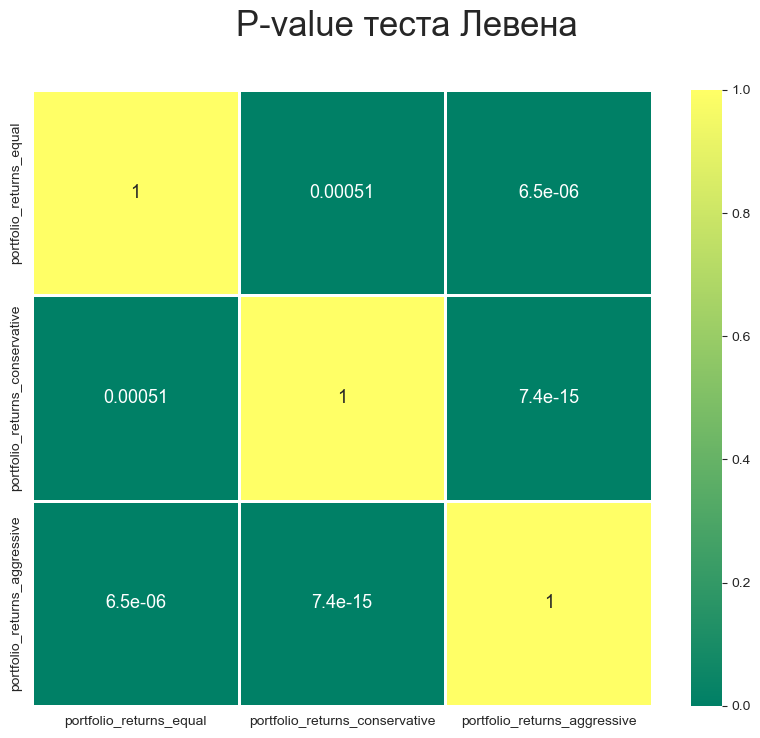

In [21]:

# создание и заполнение матрицы значениями p-value
p_values = pd.DataFrame(0, index=portfolio_returns_names, columns=portfolio_returns_names)

for i in portfolio_returns_names:
    for j in portfolio_returns_names:
        if i == j:
            p_values.loc[i, j] = 1.0
        else:
            test_result = stats.levene(portfolio_returns[i], portfolio_returns[j])
            p_values.loc[i, j] = test_result.pvalue

# p_values.round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(p_values, annot=True, cmap='summer', linewidths=1, vmin=0, annot_kws={"fontsize":13})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.suptitle('P-value теста Левена', fontsize=25)

In [22]:
# Средние доходности портфелей
print(
    ' Портфель с равными весами:', portfolio_returns_equal.mean(), '\n',
    'Консервативный портфель:', portfolio_returns_conservative.mean(), '\n',
    'Агрессивный портфель:', portfolio_returns_aggressive.mean()
)

 Портфель с равными весами: 0.003928145371783723 
 Консервативный портфель: 0.0032332993680020817 
 Агрессивный портфель: 0.004409998785695884


## Так как мы знаем, что для некоторых переменных дисперсии не равны, мы можем использовать тест Манна-Уитни для измерения средних

#### H0 (нулевая гипотеза) -> Средние равны -> Различия в средней доходности не значимы
#### H1 (альтернативная гипотеза)-> Средние не равны -> Различия в средней доходности значимы

## $\alpha$ = 5%

Text(0.5, 0.98, 'P-value теста Манна-Уитни')

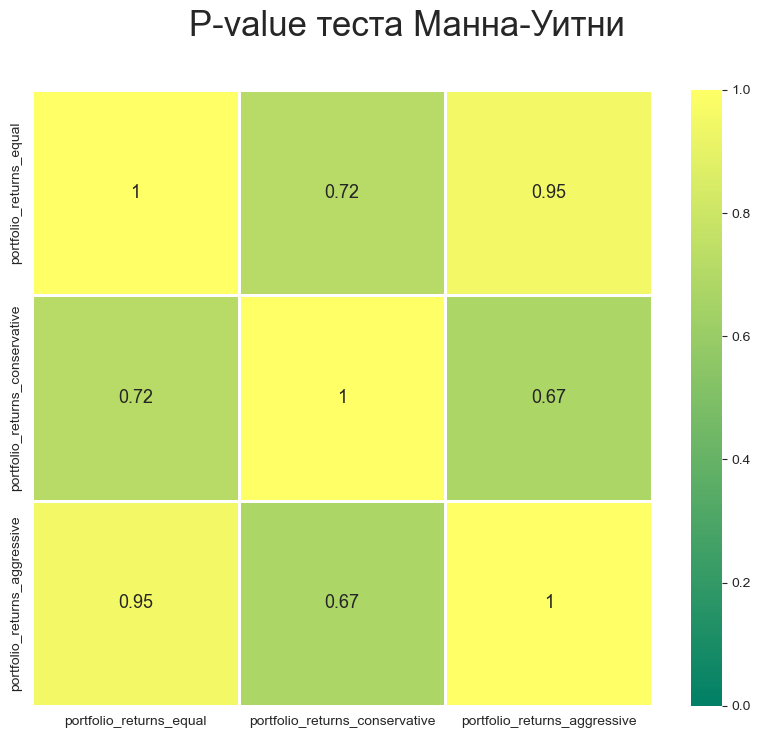

In [23]:
# создание и заполнение матрицы значениями p-value
p_values = pd.DataFrame(0, index=portfolio_returns_names, columns=portfolio_returns_names)

for i in portfolio_returns_names:
    for j in portfolio_returns_names:
        if i == j:
            p_values.loc[i, j] = 1.0
        else:
            test_result = stats.mannwhitneyu(portfolio_returns[i], portfolio_returns[j])
            p_values.loc[i, j] = test_result.pvalue

# p_values.round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(p_values, annot=True, cmap='summer', linewidths=1, vmin=0, annot_kws={"fontsize":13})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.suptitle('P-value теста Манна-Уитни', fontsize=25)

### Выводы: значение p-value при сравнении дисперсий агрессивного портфеля и всех остальных ниже ранее установленного значения $\alpha$=5%, что говорит о его значимом различии в волатильности. Она выше, чем остальные волатильности, а значит и риск - выше.
### Сравнивая консервативный портфель и портфель с равными весами, значение p-value=0.67, что говорит о гомогенности дисперсий и незначимом различии в волатильности, следовательно различия в риске незначительны

(-0.05, 0.06)

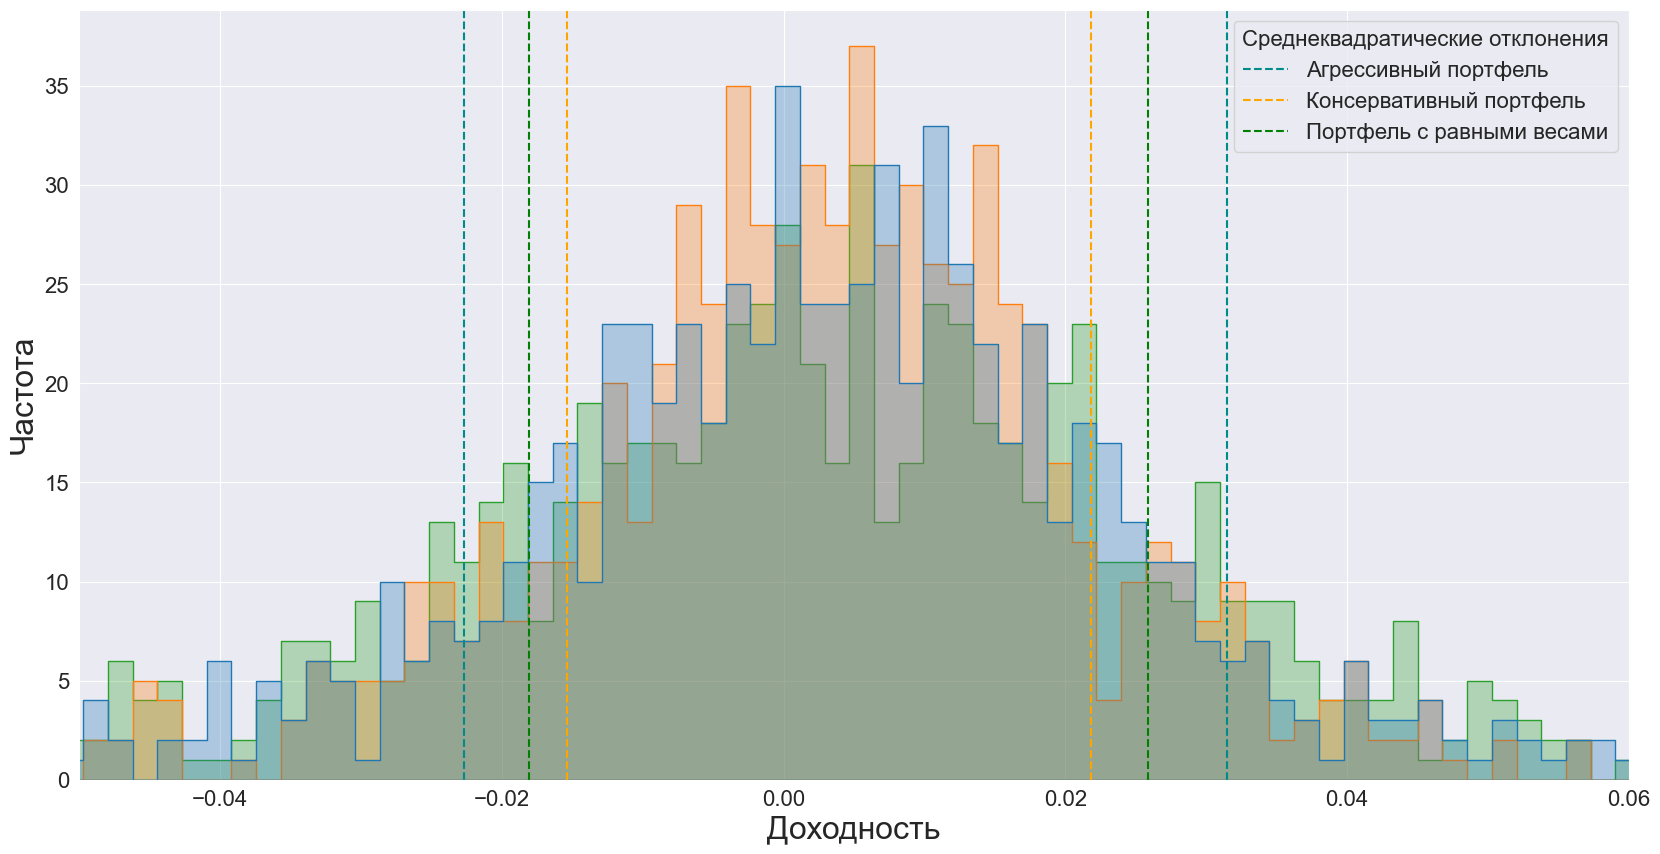

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(data=portfolio_returns, ax=ax, alpha=0.3, element='step', bins=100)

ax.axvline(portfolio_returns_aggressive.mean() - portfolio_returns_aggressive.std(ddof=1), color='darkcyan', linestyle='--', label='Агрессивный портфель')
ax.axvline(portfolio_returns_aggressive.mean() + portfolio_returns_aggressive.std(ddof=1), color='darkcyan', linestyle='--')

ax.axvline(portfolio_returns_conservative.mean() - portfolio_returns_conservative.std(ddof=1), color='orange', linestyle='--', label='Консервативный портфель')
ax.axvline(portfolio_returns_conservative.mean() + portfolio_returns_conservative.std(ddof=1), color='orange', linestyle='--')

ax.axvline(portfolio_returns_equal.mean() - portfolio_returns_equal.std(ddof=1), color='green', linestyle='--', label='Портфель с равными весами')
ax.axvline(portfolio_returns_equal.mean() + portfolio_returns_equal.std(ddof=1), color='green', linestyle='--')

ax.legend(fontsize=16, title='Среднеквадратические отклонения', title_fontsize=16)

ax.set_xlabel('Доходность', fontsize=23)
ax.set_ylabel('Частота', fontsize=23)
ax.tick_params(axis='both', labelsize=16)

ax.set_xlim((-0.05, 0.06))

На построенной гистограмме видны распределения доходностей и средние отклонения (вертикальные линии)

In [25]:
portfolio_returns.to_pickle('доходности.pkl')